<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/NLTK/Tutorial%201%3A%20Library%20Imports%20%26%20NLTK.text%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Library Imports and NLTK.text Analysis

**Tutorial 1.1: Downloading Libs and Testing That They Are Working**

Install and import necessary libraries to prepare for text analysis (need to run ! pip install for those not in Colab by default)

In [ ]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
import tweepy # https://github.com/tweepy/tweepy
!pip install TwitterSearch
import TwitterSearch # https://github.com/ckoepp/TwitterSearch
!pip install unidecode
import unidecode # https://pypi.python.org/pypi/Unidecode
!pip install langdetect
import langdetect # https://pypi.python.org/pypi/langdetect
!pip install langid
import langid # https://github.com/saffsd/langid.py
import gensim # https://radimrehurek.com/gensim/install.html

     |████████████████████████████████| 1.9 MB 5.4 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=19fe02a2b2c1f90643444c783a94e9d950a618a705dd30019f26c78ba89a9491
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb558949a28b13470fc74b8
Successfully built langid


**Tutorial 1.2: Text Analysis Using NLTK.text**

Conduct basic tokenization and text analysis using NLTK.text module (concordancing, collocations, counting and indexing, distributional similarity, dispersion plot, plot, vocab, common contexts)

In [ ]:
#Download NLTK packages including punkt and stopwords (not in original Jupyter notebook)
from nltk.tokenize import word_tokenize
from nltk.text import Text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('reuters')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [ ]:
#Split string into tokens and lowercase tokens, then print first five tokens
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
tokens[:5]

['two', 'plus', 'two', 'is', 'four']

In [ ]:
#Assign text of tokens to variable t
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK Text instances can be used when reading text from a file. For instance: f = open('my-file.txt','rU') 

Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"

raw = f.read()

***Concordances*:** Find every occurence of specified word in context

In [ ]:
# concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
# concordance() is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.
t.concordance('uckers')

Displaying 1 of 1 matches:
 girl in the park , that girl is an uckers . when the thing went quack quack q


***Collocations:*** Find multiple words which commonly co-occur

In [ ]:
# def collocations(self, num=20, window_size=2). num is the max no. of collocations to print.
t.collocations()

hold tight; quack quack


***Count and Index:*** Find frequency of word appearance, position of word in text

In [ ]:
#Count number of time word appears in text
t.count('quack')

0

In [ ]:

#Count position of word in text
t.index('two')

***Distributional Similarity:*** Find other words which appear in the same contexts as the specified word; list most similar words first.


In [ ]:
#similar(self, word, num=20).
t.similar('brother') 

guy


***Dispersion Plot:*** Find and plot instances of word(s) as distributed across text

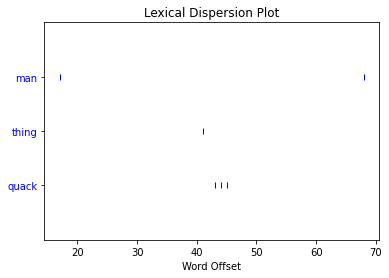

In [ ]:
# Reveals patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.
t.dispersion_plot(['man', 'thing', 'quack']) 

***Plot:*** Find and plot specified number of most common tokens

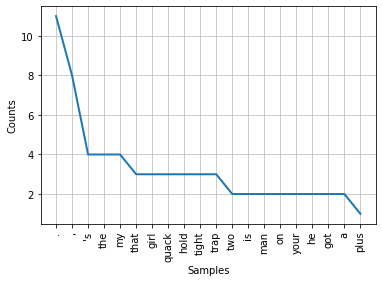

In [ ]:
t.plot(20) # plots 20 most common tokens

***Vocab:*** Find frequency of each token in text

In [ ]:
t.vocab()

FreqDist({'!': 1,
          "'s": 4,
          ',': 8,
          '.': 11,
          'a': 2,
          'an': 1,
          'asznee': 1,
          'block': 1,
          'brother': 1,
          'cornflakes': 1,
          'crispies': 1,
          'day': 1,
          'ducking': 1,
          'every': 1,
          'four': 1,
          'frisbee': 1,
          'girl': 3,
          'got': 2,
          'guy': 1,
          'he': 2,
          'hold': 3,
          'i': 1,
          'in': 1,
          'is': 2,
          'man': 2,
          'maths': 1,
          'men': 1,
          'minus': 1,
          'moving': 1,
          'my': 4,
          'on': 2,
          'one': 1,
          'park': 1,
          'phone': 1,
          'plus': 1,
          'pumpy': 1,
          'quack': 3,
          'quick': 1,
          'rice': 1,
          'see': 1,
          'smoke': 1,
          'that': 3,
          'the': 4,
          'thing': 1,
          'three': 1,
          'tight': 3,
          'trap': 3,
          'tre

***Common Contexts:*** Given two words used similarly, displays where in the text they were used similarly

Another thing that might be useful in analysis is finding common contexts. Our text is too small so we will use a bigger one.

NLTK comes with several interesting corpora, which are large collections of text. You can check out what kinds of corpora are found in nltk.corpus in Section 1 here.

reuters is a corpus of news documents. More specifically, reuters is a corpus reader for the Reuters corpus which provides us with methods to access the corpus:

In [ ]:
#Import and unzip Reuters corpus
from nltk.corpus import reuters
nltk.download('reuters')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora/.

In [ ]:
from nltk.corpus import reuters
# .words() is one method corpus readers provide for reading data from a corpus. We will learn more about these methods in Chapter 2.
text = Text(reuters.words()) 
# It seems that .common_contexts() takes 2 words which are used similarly and displays where they are used similarly. It also seems that '_' indicates where the words would be in the text.
text.common_contexts(['August', 'June']) 

in_1986 and_and by_. begins_1 paid_1986 in_, early_. or_, /_shipment
of_. last_. for_shipment for_to on_3 on_12 on_19 last_when in_.
in_1987 -_.
